In [1]:
# Obtaining Dataset
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
!unzip cats_and_dogs_filtered.zip

--2020-06-11 08:15:46--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.187.128, 2404:6800:4008:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.187.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  89.9MB/s    in 0.7s    

2020-06-11 08:15:47 (89.9 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]

Archive:  cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  i

In [0]:
# Dataset
import os
os.chdir('cats_and_dogs_filtered/')
print("Training Images of Dogs:", len(os.listdir('train/dogs')))
print("Training  Images of Cats:", len(os.listdir('train/cats')))
print("Validation Images of Dogs:", len(os.listdir('validation/dogs')))
print("Validation Images Cats:", len(os.listdir('validation/cats')))
os.chdir('..')

Training Images of Dogs: 1000
Training  Images of Cats: 1000
Validation Images of Dogs: 500
Validation Images Cats: 500


In [2]:
# Importing Libraries
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

import cv2
from google.colab.patches import cv2_imshow

Using TensorFlow backend.


In [3]:
# Preparing Data
train_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('cats_and_dogs_filtered/train',
                                                 target_size = (150, 150),
                                                 batch_size = 128,
                                                 shuffle = True,
                                                 class_mode = 'binary')
validation_set = validation_datagen.flow_from_directory('cats_and_dogs_filtered/validation',
                                                 target_size = (150, 150),
                                                 batch_size = 128,
                                                 class_mode = 'binary')

label_map = (training_set.class_indices) # {'cats': 0, 'dogs': 1}

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


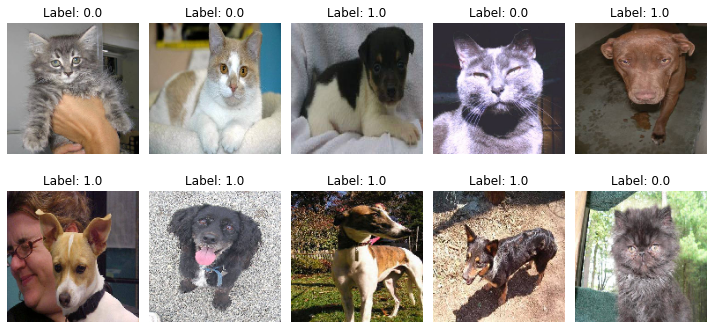

In [0]:
# Plotting 2x5 Images from Training Set
sample_images, sample_labels = next(training_set)
fig, axes = plt.subplots(2, 5, figsize=(10,5))
axes = axes.flatten()
for img, label, ax in zip(sample_images[:10], sample_labels[:10], axes):
    ax.imshow(img)
    ax.axis('off')
    ax.set_title('Label: ' + str(label))
plt.tight_layout()
plt.show()

In [0]:
# Deep Learning Model
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape = (150, 150, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [0]:
# Model Training
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit_generator(training_set,
                    steps_per_epoch = 2000 // 128,
                    epochs = 15,
                    validation_data = validation_set,
                    validation_steps = 1000 // 128)

Epoch 1/15
15/15 [==============================] - 10s 675ms/step - loss: 1.0638 - accuracy: 0.4984 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 2/15
15/15 [==============================] - 9s 590ms/step - loss: 0.6894 - accuracy: 0.5219 - val_loss: 0.6700 - val_accuracy: 0.4908
Epoch 3/15
15/15 [==============================] - 9s 572ms/step - loss: 0.6698 - accuracy: 0.5764 - val_loss: 0.6276 - val_accuracy: 0.6479
Epoch 4/15
15/15 [==============================] - 8s 559ms/step - loss: 0.6233 - accuracy: 0.6549 - val_loss: 0.5804 - val_accuracy: 0.6147
Epoch 5/15
15/15 [==============================] - 8s 523ms/step - loss: 0.5784 - accuracy: 0.6896 - val_loss: 0.5880 - val_accuracy: 0.6456
Epoch 6/15
15/15 [==============================] - 7s 495ms/step - loss: 0.5125 - accuracy: 0.7340 - val_loss: 0.6134 - val_accuracy: 0.6812
Epoch 7/15
15/15 [==============================] - 8s 500ms/step - loss: 0.4620 - accuracy: 0.7831 - val_loss: 0.5819 - val_accuracy: 0.6892
Epoch

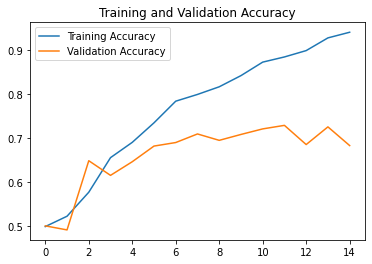

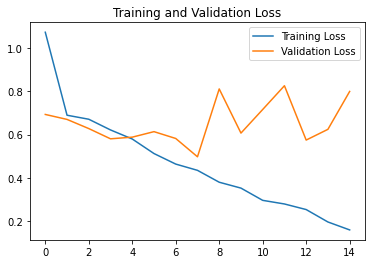

In [0]:
# Model Evaluation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(15)

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Testing with Custom Image
filename = 'dog_sample.jpg'
image = cv2.imread(filename)
image = cv2.resize(image, (150,150))
image = image.reshape(1, 150, 150, 3)
res = model.predict_classes(image)

cv2_imshow(cv2.imread(filename))
for category, label in label_map.items():
  if label == res[0][0]:
    print("Predicted Class:", category)